<a href="https://colab.research.google.com/github/szh141/Examples/blob/main/Affine_using_skimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Similarity matrix 

[[  0.48296291  -0.12940952 100.        ]
 [  0.12940952   0.48296291  50.        ]
 [  0.           0.           1.        ]]

 Affine matrix 

[[ 1.         -0.57735027  0.        ]
 [ 0.          1.          0.        ]
 [ 0.          0.          1.        ]]


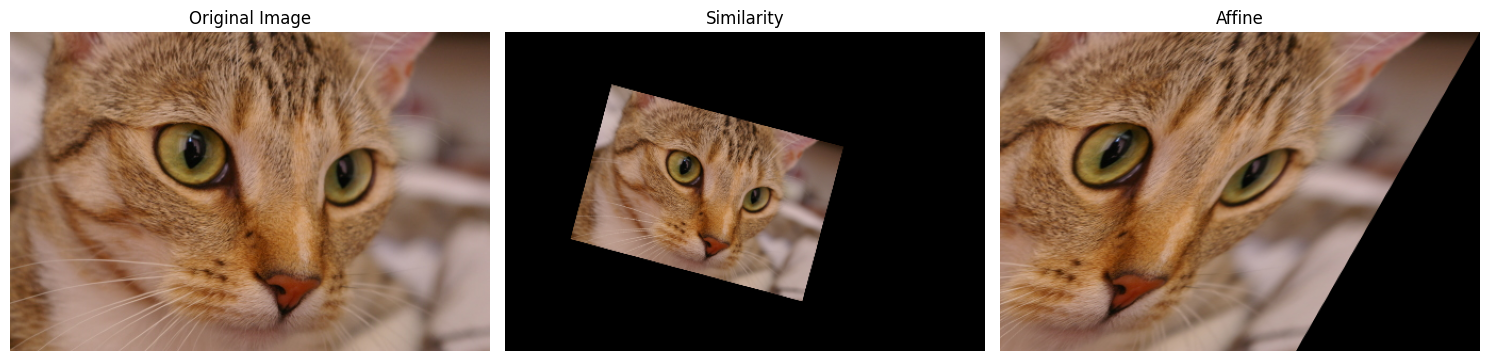

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform
from skimage import img_as_float

img = img_as_float(data.chelsea())

scale=0.5
rotation=np.pi / 12
translation=(100, 50)
shear=np.pi / 6

# define two helper functions

def apply_similarity(img, scale, rotation, translation):
  tform_similarity = transform.SimilarityTransform(
  scale=scale, rotation=rotation, translation=translation
)
  print('Similarity matrix','\n')
  print(tform_similarity.params)
  return transform.warp(img, tform_similarity.inverse)

def apply_affine(img, shear):
  tform_affine = transform.AffineTransform(
  shear=shear
)
  print('\n', 'Affine matrix','\n')
  print(tform_affine.params)
  return transform.warp(img, tform_affine.inverse)

def plot_images(original, similarity, affine):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    ax1.imshow(original)
    ax1.set_title('Original Image')
    ax1.axis('off')

    ax2.imshow(similarity)
    ax2.set_title('Similarity')
    ax2.axis('off')

    ax3.imshow(affine)
    ax3.set_title('Affine')
    ax3.axis('off')

    plt.tight_layout()
    plt.show()

similarity = apply_similarity(img, scale, rotation,translation)
affine = apply_affine(img, shear)
# Display the results
plot_images(img, similarity, affine)